<a href="https://colab.research.google.com/github/Alilson2/Projeto_IA/blob/main/C%C3%B3pia_de_ProjetoIA_ver_David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se precisar gerar os dados execute desde o começo, se não precisar basta executar a partir da célula que carrega o arquivo teste.csv

In [ ]:
!pip uninstall -y scipy statsmodels
!pip install pmdarima==2.0.4

Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompat

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr # Ler arquivos netcdf
from google.colab import drive
import seaborn as sns

!pip install cartopy
import cartopy

import cartopy.crs as ccrs # Escolha do sistema de coordenadas
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.patches as mpatches # Desenhar geometria em um mapa

In [ ]:
import os
import xarray as xr

# --- Clonar repositório se não existir ---
if not os.path.exists("Projeto_IA"):
    !git clone https://github.com/Alilson2/Projeto_IA.git
else:
    print("📁 Repositório 'Projeto_IA' já existe — pulando o clone.")

# --- Verificar se a pasta foi criada ---
if not os.path.exists("Projeto_IA"):
    raise FileNotFoundError("❌ A pasta 'Projeto_IA' não foi encontrada. O clone pode ter falhado.")
else:
    print("\n✅ Repositório clonado com sucesso!\n")
    print("Arquivos dentro da pasta Projeto_IA:\n", os.listdir("Projeto_IA"))

# --- Localizar arquivos .nc ---
arquivos_nc = [f for f in os.listdir("Projeto_IA") if f.endswith(".nc")]
if not arquivos_nc:
    raise FileNotFoundError("❌ Nenhum arquivo .nc encontrado na pasta Projeto_IA!")
else:
    print("\n📂 Arquivo(s) NetCDF encontrado(s):")
    for f in arquivos_nc:
        print(" -", f)

# --- Montar lista de caminhos ---
ARQUIVO = [os.path.join("Projeto_IA", f) for f in arquivos_nc]

# --- Função para corrigir longitude ---
def corrigir_longitude(ds):
    for coord in ["longitude", "lon"]:
        if coord in ds.coords:
            ds = ds.assign_coords({coord: ((ds[coord] + 180) % 360) - 180})
            ds = ds.sortby(coord)
    return ds

# --- Abrir arquivos com segurança (nova sintaxe) ---
try:
    dados = xr.open_mfdataset(
        ARQUIVO,
        combine='by_coords',
        parallel=True,           # usa múltiplos núcleos
        preprocess=corrigir_longitude,
        combine_attrs='override' # 🟢 substitui o antigo compat='override'
    )
except ValueError as e:
    print("\n⚠️ Erro na combinação — tentando modo 'nested' (concat por tempo)...")
    dados = xr.open_mfdataset(
        ARQUIVO,
        combine='nested',
        concat_dim='valid_time',  # ajuste se sua dimensão temporal tiver outro nome
        parallel=True,
        preprocess=corrigir_longitude,
        combine_attrs='override'
    )

print("\n✅ Dataset carregado com sucesso!\n")
dados

Cloning into 'Projeto_IA'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 215 (delta 46), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (215/215), 151.61 MiB | 20.14 MiB/s, done.
Resolving deltas: 100% (46/46), done.

✅ Repositório clonado com sucesso!

Arquivos dentro da pasta Projeto_IA:
 ['JUL 2022 - 1a15.nc', '(DEZEMBRO 2021- 16 a 31).nc', '(JUN 2020-25 a 30).nc', '(JANEIRO 2023 - 16a31) 94ce3bca85fad1ca87acdd2bfbff170b.nc', '(DEZEMBRO 2024 - 16a31) 39b3910eee1ef3c1aaa6ca43cba3f9a5.nc', '(MARÇO 2024 - 1a15) 27b35cf2be7d06ee99adbf9b6c8a7e3d.nc', '(NOVEMBRO 2024 - 16a30) 2bc2ce1cf8f6193f8ac01ddb9ffddd3a.nc', 'MAI 2022 - 16a31.nc', '(MAIO 2024 - 1a15) 43295239c76e33d0ac9a1fdb69ad8f44.nc', '(SET 2020-1 a 24).nc', 'AGO 2022 - 16a31.nc', '(JUL 2020-25 a 31).nc', '(AGOSTO 2023 - 16a31) 824b00b203747907d587029305d2bc37.nc', '(Junho 2021-1 a 15).nc', '(AGOSTO 2024

/tmp/ipython-input-2195183609.py:39: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'valid_time' ('valid_time',) The recommendation is to set join explicitly for this case.
  dados = xr.open_mfdataset(
/tmp/ipython-input-2195183609.py:39: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'latitude' ('latitude',) The recommendation is to set join explicitly for this case.
  dados = xr.open_mfdataset(



⚠️ Erro na combinação — tentando modo 'nested' (concat por tempo)...


/tmp/ipython-input-2195183609.py:48: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'latitude' ('latitude',) The recommendation is to set join explicitly for this case.
  dados = xr.open_mfdataset(
/tmp/ipython-input-2195183609.py:48: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'longitude' ('longitude',) The recommendation is to set join explicitly for this case.
  dados = xr.open_mfdataset(



✅ Dataset carregado com sucesso!



<xarray.Dataset> Size: 464MB
Dimensions:     (valid_time: 43848, latitude: 12, longitude: 22)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 351kB 2022-07-01 ... 2022-09-30T2...
  * latitude    (latitude) float64 96B -24.2 -24.2 -24.1 ... -23.4 -23.3 -23.2
  * longitude   (longitude) float64 176B -47.2 -47.19 -47.1 ... -46.2 -46.19
    number      int64 8B 0
    expver      (valid_time) <U4 702kB dask.array<chunksize=(360,), meta=np.ndarray>
Data variables:
    d2m         (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    slhf        (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    sshf        (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    ssrd        (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    e           (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    u10         (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    sp          (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 46MB dask.array<chunksize=(360, 11, 11), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-27T16:17 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
df = dados.to_dataframe()
df = df.dropna()

In [ ]:
df

In [ ]:

# --- 2️⃣ Verificar se há a coordenada temporal ---
if "valid_time" not in dados.coords:
    raise ValueError("❌ O dataset não contém uma coordenada temporal chamada 'valid_time'.")

# --- 3️⃣ Converter o eixo temporal para pandas.DatetimeIndex ---
tempo = pd.to_datetime(dados["valid_time"].values)

# --- 4️⃣ Criar DataFrame com componentes temporais ---
df_tempo = pd.DataFrame({
    "timestamp": tempo,
    "timestamp_segundos": tempo.view("int64"),   # segundos desde 1970
    "ano": tempo.year,
    "mes": tempo.month,
    "dia": tempo.day,
    "hora": tempo.hour,
    "minuto": tempo.minute,
    "segundo": tempo.second,
    "dia_semana": tempo.dayofweek,
    "dia_do_ano": tempo.dayofyear
})

#print(df_tempo.head())

# Exemplo: seleciona uma variável e um período
# Sort the dataset by valid_time before slicing
dados_sorted = dados.sortby('valid_time')
dados_filtrado = dados_sorted

# Converte para pandas sem estourar RAM
df_panda = dados_filtrado.to_dataframe().reset_index()
df_panda = df_panda.dropna()

# Junta com df_tempo
df_final = pd.merge(
    df_panda,
    df_tempo,
    left_on='valid_time',
    right_on='timestamp',
    how='left'
)

df_panda

,valid_time,latitude,longitude,d2m,t2m,slhf,sshf,ssrd,e,u10,v10,sp,tp,number,expver
23,2020-01-01 00:00:00,-24.2,-47.1900,295.882446,296.606445,-12626415.0,-5374780.5,27156416.0,-0.005049,-1.368388,-0.228513,97930.375,0.000336,0,0001
25,2020-01-01 00:00:00,-24.2,-47.0900,295.884033,296.721313,-13061472.0,-4630067.0,27113798.0,-0.005223,-1.634807,-0.463254,97935.625,0.000315,0,0001
27,2020-01-01 00:00:00,-24.2,-46.9900,296.079102,297.012085,-12878046.0,-4912239.0,27059548.0,-0.005150,-2.066936,-0.630246,99164.375,0.000344,0,0001
29,2020-01-01 00:00:00,-24.2,-46.8900,296.284790,297.303894,-12609391.0,-5259170.0,27010644.0,-0.005042,-2.459788,-0.772641,100463.125,0.000375,0,0001
45,2020-01-01 00:00:00,-24.1,-47.1900,295.862305,296.350220,-13214768.0,-4408237.5,27057096.0,-0.005284,-1.229838,-0.336697,96580.875,0.000525,0,0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575862,2024-12-31 23:00:00,-23.2,-46.5964,291.250549,293.717224,-10255067.0,-4246329.0,24612220.0,-0.004101,-2.006104,0.661022,91489.500,0.002697,0,0001
11575864,2024-12-31 23:00:00,-23.2,-46.4963,291.174194,293.420593,-9786872.0,-5151808.0,24490392.0,-0.003913,-1.859314,0.597393,90996.000,0.002424,0,0001
11575866,2024-12-31 23:00:00,-23.2,-46.3962,291.230957,293.562927,-9981260.0,-4897497.5,24498628.0,-0.003991,-1.728638,0.578381,91276.000,0.002353,0,0001
11575868,2024-12-31 23:00:00,-23.2,-46.2961,291.578003,293.923645,-10155309.0,-4563473.5,24513856.0,-0.004061,-1.633911,0.573956,92056.250,0.002304,0,0001


In [ ]:
print(np.unique(df_panda['latitude'].values))
print(np.unique(df_panda['longitude'].values))
print(len(np.unique(df_panda['latitude'].values)))
print(len(np.unique(df_panda['longitude'].values)))

In [ ]:
tempo = np.unique(df_panda['valid_time'].values)
tempo

In [ ]:
from tqdm import tqdm

df_panda.keys()

In [ ]:
import numpy as np
import pandas as pd

def calcula_vapor_umidade(data):
    # Temperatura e ponto de orvalho em Celsius
    t2m_celsius = data["t2m"] - 273.15
    d2m_celsius = data["d2m"] - 273.15

    # 1) Pressão de vapor de saturação (es) em Pa
    es = 610.94 * np.exp(17.625 * t2m_celsius / (243.04 + t2m_celsius))

    # 2) Pressão de vapor real (ev) em Pa
    ev = 610.94 * np.exp(17.625 * d2m_celsius / (243.04 + d2m_celsius))

    # 3) Umidade Relativa (%)
    RH = 100 * ev / es

    # 4) Déficit de Pressão de Vapor (kPa)
    VPD = (es - ev) / 1000

    # Retorna como DataFrame para fácil concatenação
    return pd.DataFrame({
        "es": es,
        "ev": ev,
        "RH": RH,
        "VPD": VPD
    })

# --- Aplicar ao DataFrame original ---
resultados = calcula_vapor_umidade(df_panda)

# Adiciona novas colunas ao df_panda
df_panda = pd.concat([df_panda.reset_index(drop=True), resultados.reset_index(drop=True)], axis=1)


In [ ]:
df_panda

In [ ]:
mask = df_panda['valid_time'].values == tempo[13]
df_panda['d2m'].values[mask]

array([294.8125 , 294.81958, 295.31665, 295.9309 , 294.21216, 293.80212,
       293.98352, 294.71228, 295.07288, 294.5952 , 294.60278, 292.9895 ,
       292.6344 , 292.53723, 292.96558, 293.30774, 293.2174 , 293.61194,
       294.8059 , 292.61414, 292.44128, 292.30164, 292.23022, 292.1798 ,
       291.81982, 292.16077, 293.64905, 294.80664, 294.90063, 294.70435,
       292.52344, 292.40442, 292.2434 , 292.22693, 292.19897, 291.99463,
       292.0891 , 292.34363, 292.85107, 292.9485 , 293.08887, 292.74915,
       292.1698 , 291.8556 , 292.0835 , 292.50122, 292.58386, 292.34595,
       292.01514, 291.8938 , 291.6305 , 291.58325, 293.20764, 292.49634,
       292.07068, 292.17078, 292.57898, 292.74902, 292.63367, 292.35046,
       292.32727, 292.1377 , 291.79114, 293.74402, 293.10168, 292.7611 ,
       292.6576 , 292.61743, 292.5299 , 292.3988 , 292.45544, 292.5094 ,
       292.4862 , 292.35413, 294.13745, 293.47156, 293.14978, 292.8994 ,
       292.5896 , 292.14478, 291.95007, 291.8927 , 

In [ ]:
#RODE APENAS SE NÃO TIVER OS DADOS PRONTOS
from tqdm import tqdm
import numpy as np
import pandas as pd

def criar_dados(df_panda):
  data = []

  # Lista de variáveis a processar
  variaveis = ['d2m', 't2m', 'u10', 'v10', 'slhf', 'sshf', 'ssrd', 'sp', 'e', 'tp', 'es', 'ev', 'RH', 'VPD']

  for t in tqdm(tempo, desc="Processando tempos"):
      # Filtra as linhas com o tempo atual
      mask = df_panda['valid_time'].values == t

      # Dicionário para armazenar os resultados deste tempo
      stats = {'tempo': t}

      for var in variaveis:
          valores = df_panda[var].values[mask]

          # Se for precipitação ou evaporação, somar; caso contrário, calcular média/mín/máx
          if var in ['e', 'tp']:
              stats[f'{var}_sum'] = np.sum(valores)
          else:
              stats[f'{var}_mean'] = np.mean(valores)
              stats[f'{var}_min'] = np.min(valores)
              stats[f'{var}_max'] = np.max(valores)

      data.append(stats)

  # Converte para DataFrame
  df_resumo = pd.DataFrame(data)
  return df_resumo

In [ ]:
#RODE APENAS SE NÃO TIVER OS DADOS PRONTOS
#df_resumo = criar_dados(df_panda)
#df_resumo.to_csv('teste.csv', index=False, encoding='utf-8')

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Alilson2/Projeto_IA/main/teste.csv'
df_resumo = pd.read_csv(url)

In [ ]:
df_resumo

,tempo,d2m_mean,d2m_min,d2m_max,t2m_mean,t2m_min,t2m_max,u10_mean,u10_min,u10_max,...,ev_mean,ev_min,ev_max,RH_mean,RH_min,RH_max,VPD_mean,VPD_min,VPD_max,data
0,2020-01-01 00:00:00,294.35715,290.97913,296.40527,296.00278,294.86487,298.34375,-1.671670,-2.459788,-0.666270,...,2520.350811,2037.708369,2847.425769,90.793529,64.118763,98.381075,0.260865,0.043199,1.147642,2020-01-01
1,2020-01-01 01:00:00,294.31824,292.10450,296.99230,295.47670,294.04517,297.61250,-1.653717,-2.406607,-0.626455,...,2513.622883,2186.621767,2949.978385,93.364740,72.843492,99.174344,0.181176,0.020972,0.825427,2020-01-01
2,2020-01-01 02:00:00,294.07920,292.05470,296.87305,295.05322,293.46850,297.44598,-1.352155,-2.164139,-0.337479,...,2476.886533,2179.834825,2928.885907,94.335643,78.891616,99.628635,0.149498,0.009513,0.613241,2020-01-01
3,2020-01-01 03:00:00,293.72958,291.85193,296.77880,294.66718,292.97913,297.28674,-0.911181,-1.818641,0.163568,...,2424.424361,2152.395124,2912.312676,94.491535,82.287300,99.735729,0.140987,0.006596,0.484505,2020-01-01
4,2020-01-01 04:00:00,293.31630,291.23560,296.54980,294.25015,292.60730,297.04760,-0.436056,-1.570677,0.646486,...,2364.066126,2070.838234,2872.380601,94.464307,86.122503,99.761469,0.136942,0.006171,0.368936,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40915,2024-12-31 19:00:00,293.14930,291.33215,296.68494,296.53550,294.87085,298.68298,-1.418195,-3.344849,-0.476501,...,2339.956264,2083.433215,2895.885534,81.531515,69.042965,93.255137,0.533534,0.178391,0.981484,2024-12-31
40916,2024-12-31 20:00:00,292.78330,291.22803,296.32056,296.05594,294.44482,298.54200,-1.870405,-3.758713,-0.823227,...,2285.904956,2069.853848,2832.886955,81.975957,70.452359,91.763051,0.506006,0.237884,0.923120,2024-12-31
40917,2024-12-31 21:00:00,292.50880,290.82605,295.66480,295.75460,294.49835,298.20270,-2.341373,-4.136810,-1.276398,...,2246.497457,2018.157133,2722.529167,81.984778,73.628952,89.547855,0.494364,0.297049,0.800050,2024-12-31
40918,2024-12-31 22:00:00,292.40010,291.03040,295.14220,295.11040,293.89362,297.56177,-2.170078,-3.658921,-1.319138,...,2230.803441,2044.293711,2637.298946,84.657122,77.262895,90.000381,0.404759,0.261509,0.649820,2024-12-31


In [ ]:
df_resumo['tempo'] = pd.to_datetime(df_resumo['tempo'])
df_resumo['data'] = df_resumo['tempo'].dt.date
df_diario = (
    df_resumo
    .groupby('data')
    .agg({
        'd2m_mean': 'mean',
        'd2m_min': 'min',
        'd2m_max': 'max',
        't2m_mean': 'mean',
        't2m_min': 'min',
        't2m_max': 'max',
        'u10_mean': 'mean',
        'u10_min': 'min',
        'u10_max': 'max',
        'v10_mean': 'mean',
        'v10_min': 'min',
        'v10_max': 'max',
        'slhf_mean': 'mean',
        'sshf_mean': 'mean',
        'ssrd_mean': 'mean',
        'sp_mean': 'mean',
        'e_sum': 'sum',
        'tp_sum': 'sum',
        'es_mean': 'mean',
        'ev_mean': 'mean',
        'RH_mean': 'mean',
        'VPD_mean': 'mean',
        'es_min': 'min',
        'es_max': 'max',
        'ev_min': 'min',
        'ev_max': 'max',
        'RH_min': 'min',
        'RH_max': 'max',
        'VPD_min': 'min',
        'VPD_max': 'max'
    })
    .reset_index()
)
df_diario

,data,d2m_mean,d2m_min,d2m_max,t2m_mean,t2m_min,t2m_max,u10_mean,u10_min,u10_max,...,RH_mean,VPD_mean,es_min,es_max,ev_min,ev_max,RH_min,RH_max,VPD_min,VPD_max
0,2020-01-01,292.666795,287.50293,300.11768,298.356312,291.25793,305.37952,0.457941,-3.303340,3.354943,...,73.248825,0.988804,2073.746157,4810.687691,1632.416453,3552.257718,36.539641,99.761469,0.006171,2.871634
1,2020-01-02,293.406096,289.85010,299.29200,296.250915,292.52783,301.23670,0.799427,-1.667494,3.300402,...,84.489326,0.456947,2245.063660,3792.636542,1897.334838,3383.532998,61.348478,99.467196,0.012338,1.377248
2,2020-01-03,292.296292,290.12110,296.03943,294.345430,291.69934,299.01294,0.123197,-1.924273,3.471870,...,88.564353,0.303775,2131.945548,3328.116254,1930.229150,2785.105443,66.349927,99.955850,0.001040,1.110049
3,2020-01-04,291.970090,289.90393,296.24402,293.869149,290.25757,298.85193,-0.046169,-1.935276,2.982586,...,89.195695,0.279918,1946.983749,3296.503784,1903.829757,2819.807683,66.990279,99.653280,0.007672,1.088167
4,2020-01-05,292.203271,289.97754,295.42230,294.359055,290.07240,300.24730,-0.298716,-2.821115,2.675707,...,88.213359,0.336362,1924.280393,3579.405823,1912.742182,2682.684612,68.176722,99.899298,0.002168,1.133866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2024-12-27,293.573809,291.73694,297.27440,294.762819,292.62744,299.18200,0.843993,-1.466258,2.657155,...,93.104706,0.185341,2259.012237,3361.595559,2136.968422,3000.400694,78.312507,99.979259,0.000492,0.708451
1823,2024-12-28,293.463451,291.09558,299.76220,295.803074,292.18982,301.21270,-0.034025,-2.530714,2.490721,...,87.274697,0.382776,2198.292509,3787.338552,2052.693486,3478.738771,62.492942,99.234654,0.018421,1.321146
1824,2024-12-29,292.879512,290.00660,298.67175,294.771741,290.07495,300.46387,-1.349646,-4.243759,0.127316,...,89.542975,0.297529,1924.593083,3625.159429,1916.269933,3261.440122,63.196452,99.822453,0.003849,1.298997
1825,2024-12-30,292.186342,290.18005,296.72522,294.175350,290.29907,299.28467,-1.247885,-4.130829,1.023910,...,88.843421,0.300020,1952.104337,3382.068245,1937.451890,2902.924929,67.430386,99.527032,0.009406,1.026971


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df_diario['tp_sum'] = df_diario['tp_sum'].shift(-1) #determina previsão de chuva no dia seguinte IMPORTANTE: rodar apenas uma unica vez
df_diario = df_diario.dropna()

In [ ]:
#X = df_diario.drop(['data', 'tp_sum'], axis=1)
#y = df_diario['tp_sum']

ind_sem_chuva = np.where(df_diario['tp_sum']<=0.01)[0]
ind_com_chuva = np.where(df_diario['tp_sum']>0.01)[0]

scaler = StandardScaler()
# Drop the 'data' column as it's not numerical
X_scaled = scaler.fit_transform(df_diario.drop('data', axis=1))
nomes = df_diario.drop('data', axis=1).columns
df_scaled = pd.DataFrame(X_scaled, columns=nomes)

df_diario_sem_chuva = df_scaled.iloc[ind_sem_chuva]
df_diario_com_chuva = df_scaled.iloc[ind_com_chuva]

df_diario_sem_chuva['tp_sum'] = 0
df_diario_com_chuva['tp_sum'] = 1

X_sem_chuva = df_diario_sem_chuva.drop(['tp_sum'], axis=1)
y_sem_chuva = df_diario_sem_chuva['tp_sum']

X_com_chuva = df_diario_com_chuva.drop(['tp_sum'], axis=1)
y_com_chuva = df_diario_com_chuva['tp_sum']

X_train_sem_chuva, X_test_sem_chuva, y_train_sem_chuva, y_test_sem_chuva = train_test_split(X_sem_chuva, y_sem_chuva, test_size=0.2, random_state=42)
X_train_com_chuva, X_test_com_chuva, y_train_com_chuva, y_test_com_chuva = train_test_split(X_com_chuva, y_com_chuva, test_size=0.2, random_state=42)

X_train = pd.concat([X_train_sem_chuva, X_train_com_chuva])
X_test = pd.concat([X_test_sem_chuva, X_test_com_chuva])
y_train = pd.concat([y_train_sem_chuva, y_train_com_chuva])
y_test = pd.concat([y_test_sem_chuva, y_test_com_chuva])

X_train['tp_sum']


/tmp/ipython-input-1442651787.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diario_sem_chuva['tp_sum'] = 0
/tmp/ipython-input-1442651787.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diario_com_chuva['tp_sum'] = 1


KeyError: 'tp_sum'

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.9289617486338798

Matriz de confusão:
 [[ 18  18]
 [  8 322]]

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.69      0.50      0.58        36
           1       0.95      0.98      0.96       330

    accuracy                           0.93       366
   macro avg       0.82      0.74      0.77       366
weighted avg       0.92      0.93      0.92       366



✅ Limiar usado para chuva: 0.01 — 1645 dias com chuva.

🌧️ CLASSIFICAÇÃO — Vai chover ou não:
Acurácia: 0.836
[[  2  55]
 [  5 303]]
              precision    recall  f1-score   support

           0      0.286     0.035     0.062        57
           1      0.846     0.984     0.910       308

    accuracy                          0.836       365
   macro avg      0.566     0.509     0.486       365
weighted avg      0.759     0.836     0.778       365


💧 REGRESSÃO — Treino (dias chuvosos reais):
R²: 0.678 | MAE: 3.269 | RMSE: 5.040

💧 REGRESSÃO — Teste (dias chuvosos reais):
R²: -0.011 | MAE: 6.490 | RMSE: 10.201


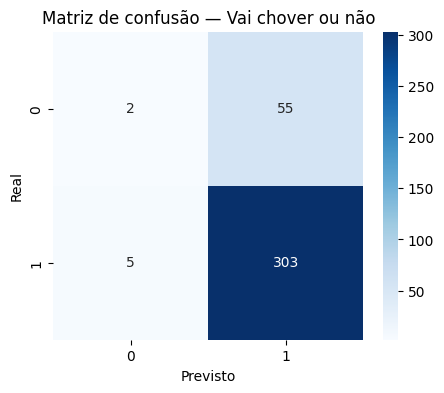

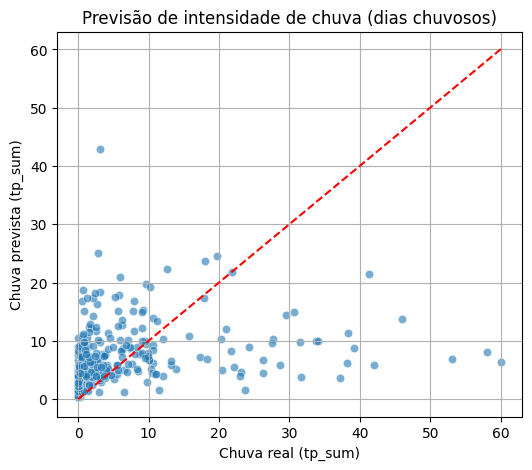

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)

# Prepara o alvo (chuva do próximo dia)

df = df_diario.copy()
df['tp_sum'] = df['tp_sum'].shift(-1)
df = df.dropna(subset=['tp_sum'])

# efine o limiar de chuva

limiar = 0.01  # em mm
if df['tp_sum'].max() < 0.1:  # se os valores forem muito pequenos, assume metros
    limiar = 0.0001

df['vai_chover'] = (df['tp_sum'] > limiar).astype(int)
print(f"✅ Limiar usado para chuva: {limiar} — {df['vai_chover'].sum()} dias com chuva.")

# Define features e splits temporais
X = df.drop(['data', 'tp_sum', 'vai_chover'], axis=1)
y_class = df['vai_chover']
y_reg = df['tp_sum']

split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_class_train, y_class_test = y_class.iloc[:split_idx], y_class.iloc[split_idx:]
y_reg_train, y_reg_test = y_reg.iloc[:split_idx], y_reg.iloc[split_idx:]

# 4️Normalização (fit só no treino)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Classificação (vai chover ou não)

clf = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42, n_jobs=-1
)
clf.fit(X_train_scaled, y_class_train)

y_pred_class = clf.predict(X_test_scaled)
acc = accuracy_score(y_class_test, y_pred_class)

print("\n🌧️ CLASSIFICAÇÃO — Vai chover ou não:")
print(f"Acurácia: {acc:.3f}")
print(confusion_matrix(y_class_test, y_pred_class))
print(classification_report(y_class_test, y_pred_class, digits=3))

# Regressão (quanto vai chover)
# Treina apenas nos dias em que realmente choveu
mask_train_chuva = y_class_train == 1
mask_test_chuva = y_class_test == 1

if mask_train_chuva.sum() == 0:
    raise ValueError("❌ Nenhum dia chuvoso encontrado para treinar a regressão!")

X_train_reg = X_train_scaled[mask_train_chuva]
y_train_reg = y_reg_train[mask_train_chuva]

reg = RandomForestRegressor(
    n_estimators=300, max_depth=10, min_samples_split=5, random_state=42, n_jobs=-1
)
reg.fit(X_train_reg, y_train_reg)

# Predição híbrida
y_pred_reg = np.zeros_like(y_reg_test)  # começa com zeros
mask_pred_chuva = y_pred_class == 1

# só prevê intensidade para os casos previstos como "chuva"
if mask_pred_chuva.sum() > 0:
    y_pred_reg[mask_pred_chuva] = reg.predict(X_test_scaled[mask_pred_chuva])

#Avaliação da regressão (somente dias chuvosos)
mask_train_chuva = y_class_train == 1
mask_test_chuva = y_class_test == 1

# --- Avaliação no conjunto de TREINO ---
if mask_train_chuva.sum() > 0:
    y_real_chuva_train = y_reg_train[mask_train_chuva]
    y_pred_chuva_train = reg.predict(X_train_scaled[mask_train_chuva])

    mae_train = mean_absolute_error(y_real_chuva_train, y_pred_chuva_train)
    rmse_train = np.sqrt(mean_squared_error(y_real_chuva_train, y_pred_chuva_train))
    r2_train = r2_score(y_real_chuva_train, y_pred_chuva_train)

    print("\n💧 REGRESSÃO — Treino (dias chuvosos reais):")
    print(f"R²: {r2_train:.3f} | MAE: {mae_train:.3f} | RMSE: {rmse_train:.3f}")
else:
    print("\n⚠️ Nenhum dia chuvoso no conjunto de treino.")

# --- Avaliação no conjunto de TESTE ---
if mask_test_chuva.sum() > 0:
    y_real_chuva_test = y_reg_test[mask_test_chuva]
    y_pred_chuva_test = reg.predict(X_test_scaled[mask_test_chuva])

    mae_test = mean_absolute_error(y_real_chuva_test, y_pred_chuva_test)
    rmse_test = np.sqrt(mean_squared_error(y_real_chuva_test, y_pred_chuva_test))
    r2_test = r2_score(y_real_chuva_test, y_pred_chuva_test)

    print("\n💧 REGRESSÃO — Teste (dias chuvosos reais):")
    print(f"R²: {r2_test:.3f} | MAE: {mae_test:.3f} | RMSE: {rmse_test:.3f}")
else:
    print("\n⚠️ Nenhum dia chuvoso no conjunto de teste.")

# --- Regressão (chuva real vs prevista) ---
if mask_test_chuva.sum() > 0:
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_real_chuva, y=y_pred_chuva, alpha=0.6)
    plt.plot([y_real_chuva.min(), y_real_chuva.max()],
             [y_real_chuva.min(), y_real_chuva.max()], 'r--')
    plt.xlabel("Chuva real (tp_sum)")
    plt.ylabel("Chuva prevista (tp_sum)")
    plt.title("Previsão de intensidade de chuva (dias chuvosos)")
    plt.grid(True)
    plt.show()



🔹 Fold 1: treino = 306 | teste = 304
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2330.095, Time=0.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2295.347, Time=0.60 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2223.358, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2328.113, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2225.401, Time=0.12 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2222.200, Time=0.60 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2222.424, Time=0.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2223.097, Time=1.16 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2222.935, Time=1.88 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2220.966, Time=1.00 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=2324.327, Time=0.73 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=2202.978, Time=1.40 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2207.549, Time=0.66 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=2204.956, Time=3.95 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2206.584, Time=1.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2292.302, Time=0.76 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=2203.947, Time=1.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=2203.841, Time=1.85 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=2201.955, Time=1.32 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2207.062, Time=0.45 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=2203.948, Time=1.51 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=2205.536, Time=0.72 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,2)[12] intercept   : AIC=2203.829, Time=2.49 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,2)[12] intercept   : AIC=2205.536, Time=3.46 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[12]             : AIC=2200.516, Time=0.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12]             : AIC=2205.641, Time=0.23 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[12]             : AIC=2202.505, Time=1.12 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12]             : AIC=2204.106, Time=0.39 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12]             : AIC=2219.147, Time=0.51 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[12]             : AIC=2202.435, Time=1.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,2)[12]             : AIC=2202.423, Time=1.26 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[12]             : AIC=2201.655, Time=1.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,2)[12]             : AIC=2204.131, Time=1.73 sec

Best model:  ARIMA(0,1,2)(0,0,2)[12]          
Total fit time: 37.407 seconds
Melhores parâmetros (fold 1): ARIMA(0, 1, 2)x(0, 0, 2, 12)
MSE fold 1: 49.2733

🔹 Fold 2: treino = 610 | teste = 304
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4480.152, Time=0.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4412.857, Time=1.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4271.504, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4478.166, Time=0.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4272.485, Time=0.31 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=4270.815, Time=1.37 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=4271.094, Time=0.50 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=4272.288, Time=2.86 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=4272.244, Time=3.33 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=4270.773, Time=1.68 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=4477.762, Time=1.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=4230.331, Time=3.79 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=4232.813, Time=0.97 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=4232.251, Time=2.92 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=4232.292, Time=1.66 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=4411.664, Time=1.35 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=4230.151, Time=3.67 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=4232.891, Time=2.30 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=4232.046, Time=3.30 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=4231.894, Time=2.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=4363.403, Time=1.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,2)[12] intercept   : AIC=4232.051, Time=4.69 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=6.59 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=4230.476, Time=2.95 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,2)[12] intercept   : AIC=4326.758, Time=2.63 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=4233.869, Time=8.01 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[12]             : AIC=4228.723, Time=1.30 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12]             : AIC=4231.504, Time=0.71 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[12]             : AIC=4230.620, Time=3.72 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12]             : AIC=4230.479, Time=2.74 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[12]             : AIC=4228.965, Time=1.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[12]             : AIC=4361.431, Time=0.69 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,2)[12]             : AIC=4230.606, Time=1.73 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[12]             : AIC=inf, Time=4.21 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12]             : AIC=4409.684, Time=0.52 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[12]             : AIC=4229.070, Time=1.49 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,2)[12]             : AIC=4324.796, Time=1.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,2)[12]             : AIC=4232.424, Time=5.51 sec

Best model:  ARIMA(2,1,1)(0,0,2)[12]          
Total fit time: 87.335 seconds
Melhores parâmetros (fold 2): ARIMA(2, 1, 1)x(0, 0, 2, 12)
MSE fold 2: 96.7967

🔹 Fold 3: treino = 914 | teste = 304
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6551.988, Time=0.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=6405.513, Time=0.71 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6421.553, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6805.204, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=6403.565, Time=0.26 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=6405.520, Time=0.88 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=6405.390, Time=2.61 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=6405.370, Time=0.37 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=6405.337, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=6419.606, Time=0.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=6407.283, Time=0.56 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=6494.817, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 6.910 seconds
Melhores parâmetros (fold 3): ARIMA(1, 0, 0)x(0, 0, 0, 12)
MSE fold 3: 98.3228

🔹 Fold 4: treino = 1218 | teste = 304
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=8816.770, Time=0.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=8630.066, Time=1.34 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=8642.723, Time=2.55 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=9169.304, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=8629.378, Time=0.30 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=8630.153, Time=0.99 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=8629.457, Time=2.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=8630.020, Time=0.50 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=8629.762, Time=0.45 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=8642.059, Time=0.24 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=8631.590, Time=0.85 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=8758.772, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 10.006 seconds
Melhores parâmetros (fold 4): ARIMA(1, 0, 0)x(0, 0, 0, 12)
MSE fold 4: 50.3228

🔹 Fold 5: treino = 1522 | teste = 304
Performing stepwise search to minimize aic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=10895.440, Time=0.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=10668.260, Time=0.92 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=10685.377, Time=1.40 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=11336.955, Time=0.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=10668.582, Time=0.36 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=10668.615, Time=5.61 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=10666.383, Time=3.73 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=10668.402, Time=1.39 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=10668.136, Time=10.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=10668.123, Time=10.57 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=10668.908, Time=2.92 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=10670.262, Time=9.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=10883.791, Time=3.42 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=10666.938, Time=5.91 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=10666.692, Time=6.22 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=10680.667, Time=3.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=10668.553, Time=7.37 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12]             : AIC=inf, Time=3.60 sec

Best model:  ARIMA(1,0,0)(1,0,1)[12] intercept
Total fit time: 76.784 seconds
Melhores parâmetros (fold 5): ARIMA(1, 0, 0)x(1, 0, 1, 12)
MSE fold 5: 94.5863

 Resultados finais da validação cruzada:
Fold 1: Params=(0, 1, 2, 0, 0, 2, 12), MSE=49.2733
Fold 2: Params=(2, 1, 1, 0, 0, 2, 12), MSE=96.7967
Fold 3: Params=(1, 0, 0, 0, 0, 0, 12), MSE=98.3228
Fold 4: Params=(1, 0, 0, 0, 0, 0, 12), MSE=50.3228
Fold 5: Params=(1, 0, 0, 1, 0, 1, 12), MSE=94.5863

 MSE médio: 77.8604 ± 22.9460


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


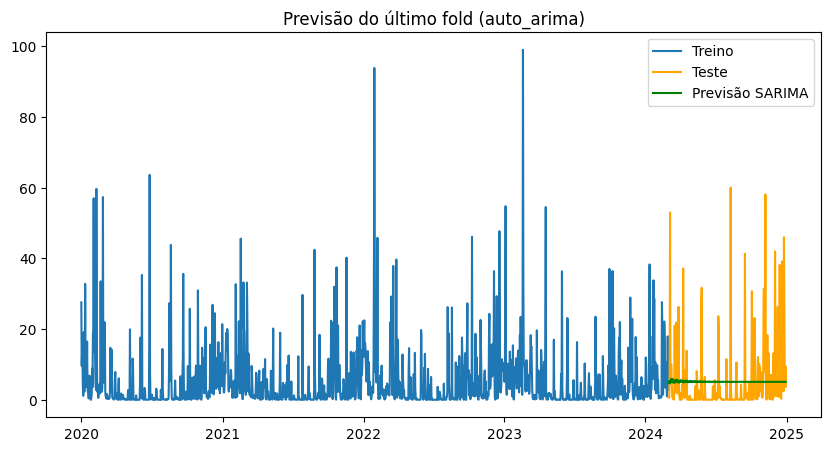

In [ ]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Série temporal alvo (precipitação diária)
y = df_diario['tp_sum']
y.index = pd.to_datetime(df_diario['data'])
y = y.asfreq('D')  # garante frequência diária

#Configuração da validação cruzada temporal
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Armazenar métricas e modelos
mse_scores = []
best_params = []
fold = 1

for train_index, test_index in tscv.split(y):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"\n🔹 Fold {fold}: treino = {len(y_train)} | teste = {len(y_test)}")


    stepwise_fit = auto_arima(
        y_train,
        start_p=0, max_p=3,
        start_q=0, max_q=3,
        start_P=0, max_P=2,
        start_Q=0, max_Q=2,
        m=12,                  # sazonalidade (12 → mensal; troque para 7 se quiser semanal)
        seasonal=True,
        d=None, D=None,
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

    best_params.append(stepwise_fit.order + stepwise_fit.seasonal_order)
    print(f"Melhores parâmetros (fold {fold}): ARIMA{stepwise_fit.order}x{stepwise_fit.seasonal_order}")

    #Previsão
    y_pred = stepwise_fit.predict(n_periods=len(y_test))

    #Métrica de erro
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"MSE fold {fold}: {mse:.4f}")

    fold += 1

# Resultados gerais
print("\n Resultados finais da validação cruzada:")
for i, (params, mse) in enumerate(zip(best_params, mse_scores), start=1):
    print(f"Fold {i}: Params={params}, MSE={mse:.4f}")

print(f"\n MSE médio: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")

# Plot do último fold
plt.figure(figsize=(10, 5))
plt.plot(y_train.index, y_train, label='Treino')
plt.plot(y_test.index, y_test, label='Teste', color='orange')
plt.plot(y_test.index, y_pred, label='Previsão SARIMA', color='green')
plt.title('Previsão do último fold (auto_arima)')
plt.legend()
plt.show()